

## Basics of Neural Networks


In [ ]:
from tensorflow.keras import models, layers, utils, backend as K
import matplotlib.pyplot as plt

In [ ]:
model = models.Sequential(name="Perceptron", layers=[
    layers.Dense(             #a fully connected layer
          name="dense",
          input_dim=3,        #with 3 features as the input
          units=1,            #and 1 node because we want 1 output
          activation='linear' #f(x)=x
    )
])
model.summary()

Model: "Perceptron"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# define the function
import tensorflow as tf
def binary_step_activation(x):
    ##return 1 if x>0 else 0 
    return K.switch(x>0, tf.math.divide(x,x), tf.math.multiply(x,0))

# build the model
model = models.Sequential(name="Perceptron", layers=[
      layers.Dense(             
          name="dense",
          input_dim=3,        
          units=1,            
          activation=binary_step_activation
      )
])

model.summary()

Model: "Perceptron"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, None)              4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
n_features = 10
model = models.Sequential(name="DeepNN", layers=[
    ### hidden layer 1
    layers.Dense(name="h1", input_dim=n_features,
                 units=int(round((n_features+1)/2)), 
                 activation='relu'),
    layers.Dropout(name="drop1", rate=0.2),
    
    ### hidden layer 2
    layers.Dense(name="h2", units=int(round((n_features+1)/4)), 
                 activation='relu'),
    layers.Dropout(name="drop2", rate=0.2),
    
    ### layer output
    layers.Dense(name="output", units=1, activation='sigmoid')
])
model.summary()

Model: "DeepNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 6)                 66        
                                                                 
 drop1 (Dropout)             (None, 6)                 0         
                                                                 
 h2 (Dense)                  (None, 3)                 21        
                                                                 
 drop2 (Dropout)             (None, 3)                 0         
                                                                 
 output (Dense)              (None, 1)                 4         
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Perceptron
inputs = layers.Input(name="input", shape=(3,))
outputs = layers.Dense(name="output", units=1, 
                       activation='linear')(inputs)
model = models.Model(inputs=inputs, outputs=outputs, 
                     name="Perceptron")

# DeepNN
### layer input
inputs = layers.Input(name="input", shape=(n_features,))
### hidden layer 1
h1 = layers.Dense(name="h1", units=int(round((n_features+1)/2)), activation='relu')(inputs)
h1 = layers.Dropout(name="drop1", rate=0.2)(h1)
### hidden layer 2
h2 = layers.Dense(name="h2", units=int(round((n_features+1)/4)), activation='relu')(h1)
h2 = layers.Dropout(name="drop2", rate=0.2)(h2)
### layer output
outputs = layers.Dense(name="output", units=1, activation='sigmoid')(h2)
model = models.Model(inputs=inputs, outputs=outputs, name="DeepNN")
model.summary()

Model: "DeepNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 10)]              0         
                                                                 
 h1 (Dense)                  (None, 6)                 66        
                                                                 
 drop1 (Dropout)             (None, 6)                 0         
                                                                 
 h2 (Dense)                  (None, 3)                 21        
                                                                 
 drop2 (Dropout)             (None, 3)                 0         
                                                                 
 output (Dense)              (None, 1)                 4         
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 

## Lung Cancer Diagnosis

In [ ]:
pip install tensorflow_addons #installing addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 9.8 MB/s eta 0:00:00


In [ ]:
from google.colab import drive #uploading the dataset on Drive, and giving access
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing libraries required
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import seaborn as sns
import cv2
import random
import os
import imageio
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from collections import Counter 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix#, plot_confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE

import tensorflow as tf
import tensorflow_addons as tfa
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from keras.applications import resnet
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7
from keras.applications.resnet import ResNet50
from tensorflow.keras.utils import load_img, img_to_array, array_to_img
from keras.preprocessing.image import ImageDataGenerator 

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
import os
os.chdir('/content/drive')
os.getcwd()

'/content/drive'

In [ ]:
directory = r'/content/drive/MyDrive/Lung_Cancer_Dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset'

categories = ['Bengin cases', 'Malignant cases', 'Normal cases']

# Image Sizes

In [ ]:
img_dims = {}
for i in categories:
    path = os.path.join(directory, i)
    ind_class = categories.index(i)
    temp_dict = {}
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        height, width, channels = imageio.imread(filepath).shape
        if str(height) + ' x ' + str(width) in temp_dict:
            temp_dict[str(height) + ' x ' + str(width)] += 1 
        else:
            temp_dict[str(height) + ' x ' + str(width)] = 1
    
    img_dims[i] = temp_dict
        
img_dims

<ipython-input-6-3269ec0e3dbe>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  height, width, channels = imageio.imread(filepath).shape


{'Bengin cases': {'512 x 512': 120},
 'Malignant cases': {'512 x 512': 504,
  '512 x 801': 28,
  '404 x 511': 1,
  '512 x 623': 31},
 'Normal cases': {'512 x 512': 425, '331 x 506': 1}}

Bengin cases


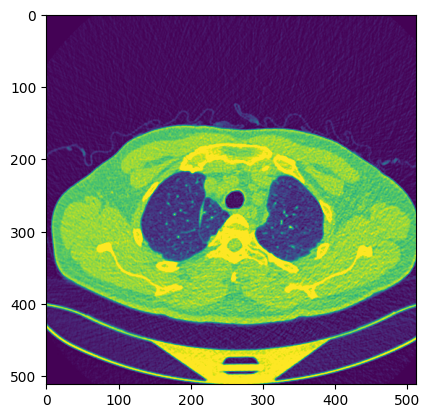

Malignant cases


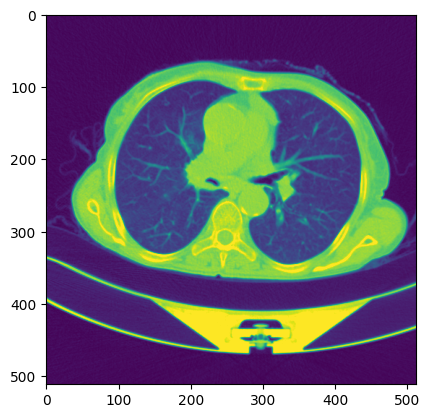

Normal cases


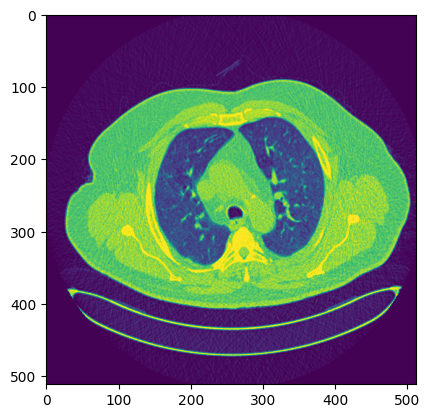

In [ ]:
for i in categories:
    path = os.path.join(directory, i)
    ind_class = categories.index(i)
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        print(i)
        img = cv2.imread(filepath, 0)
        plt.imshow(img)
        plt.show()
        break

# Preprocessing

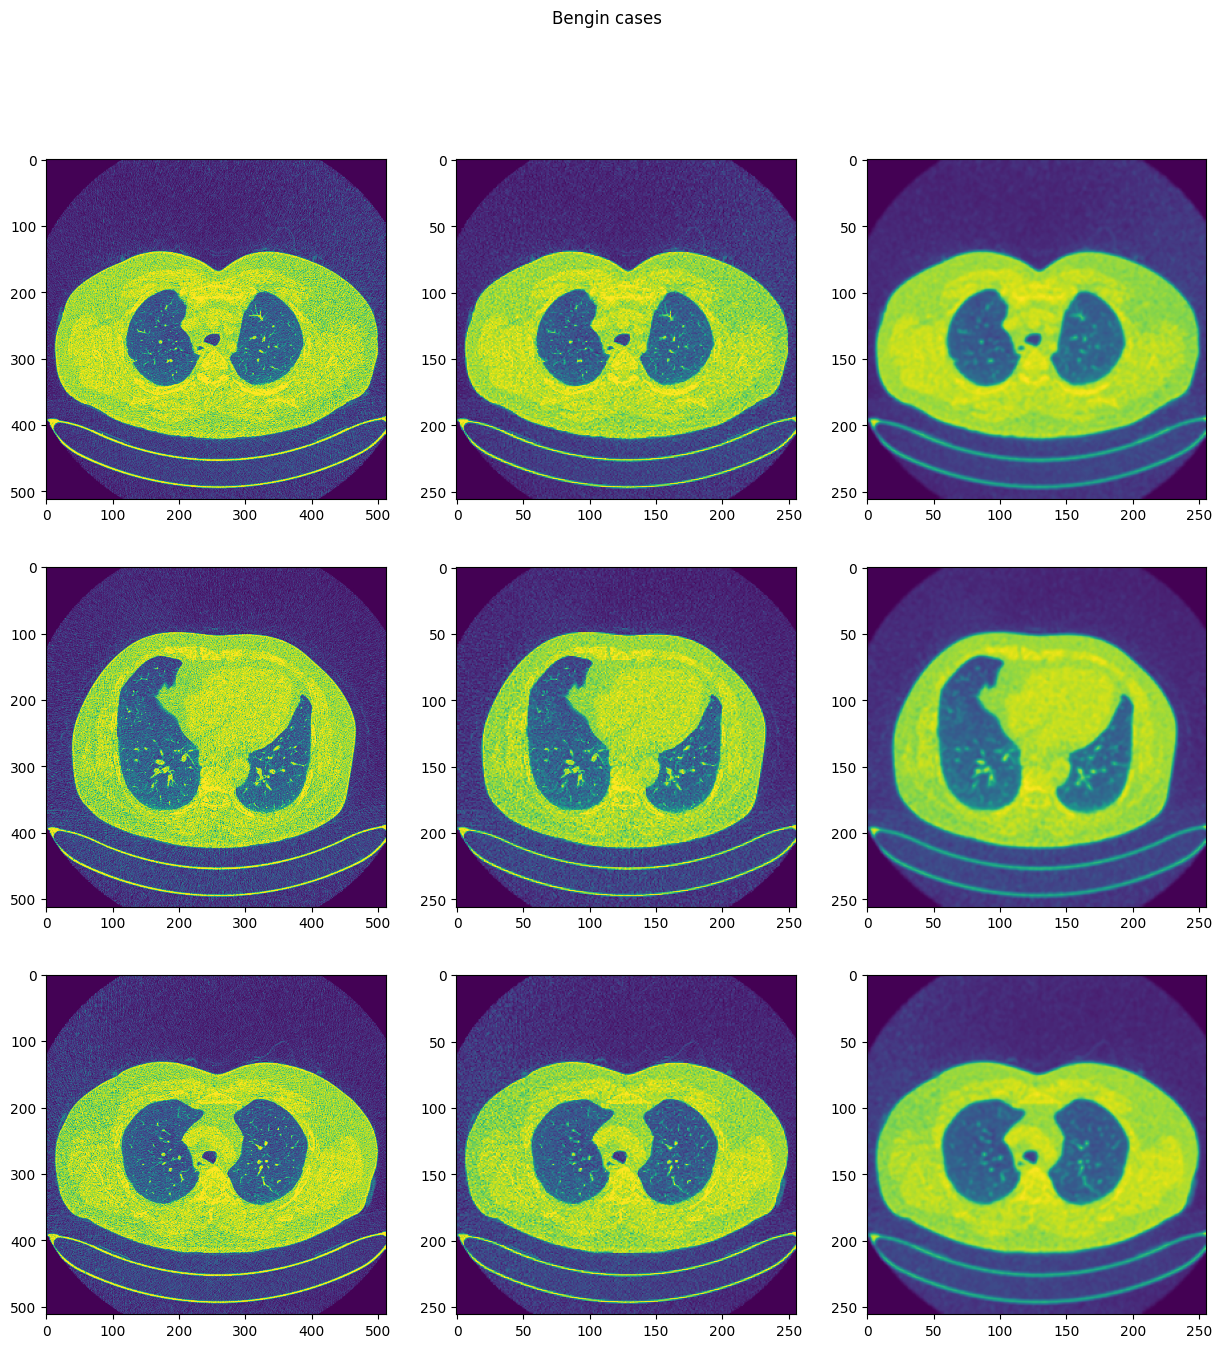

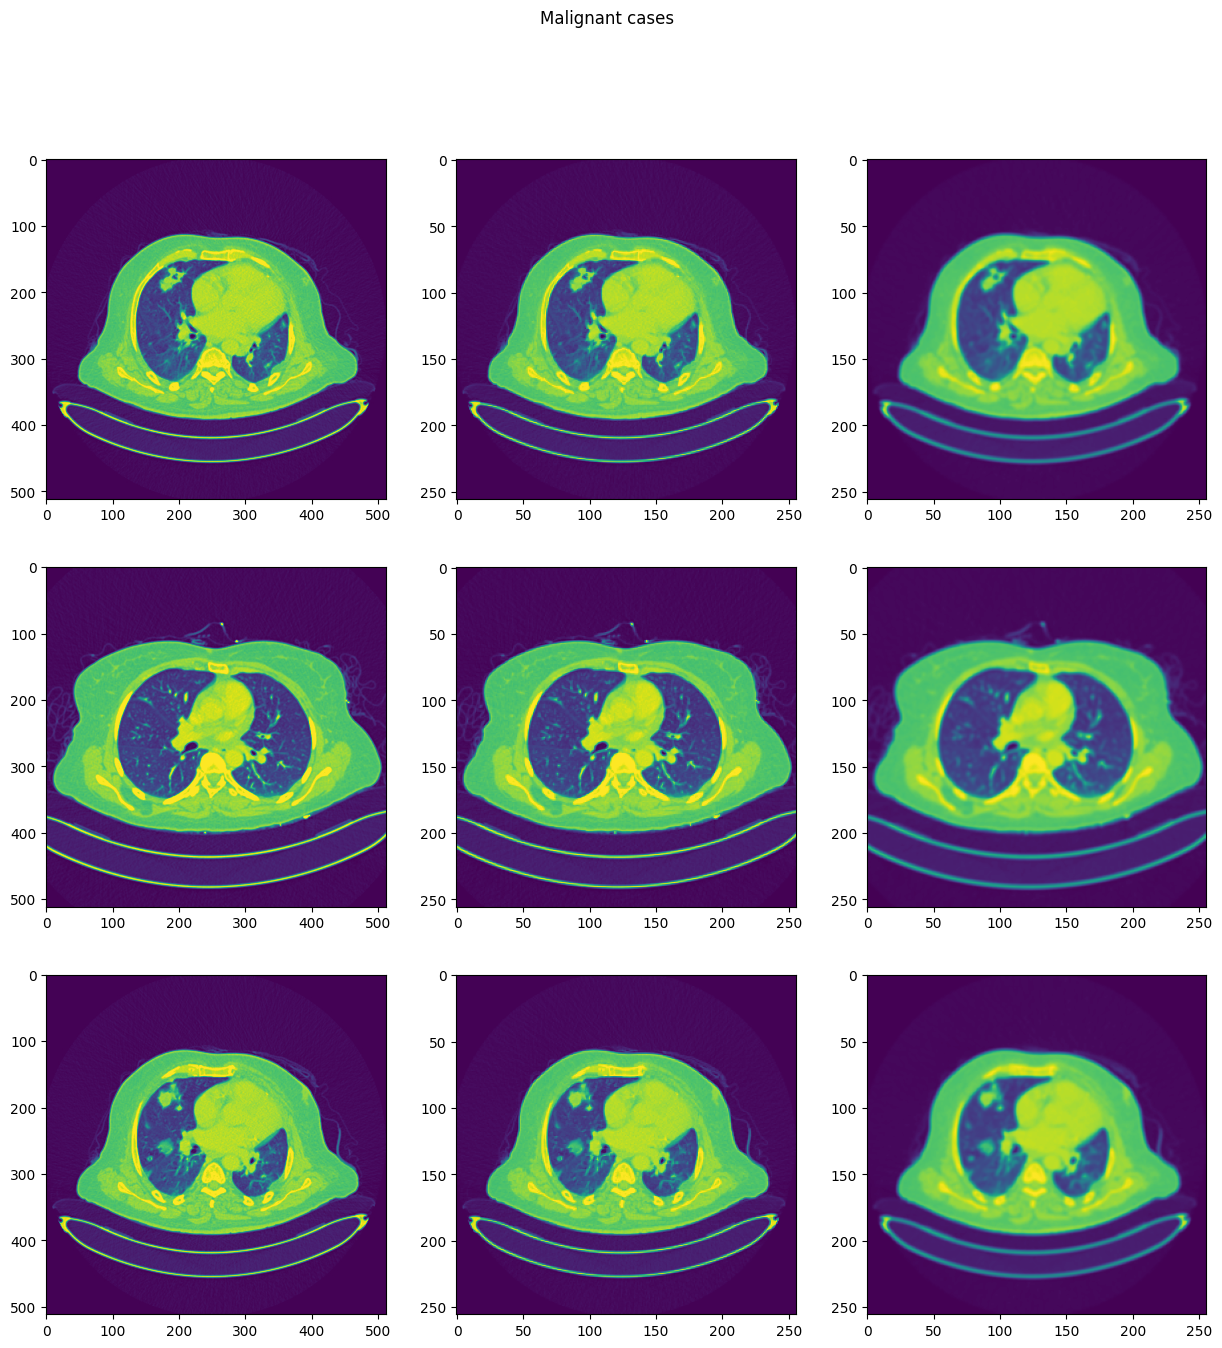

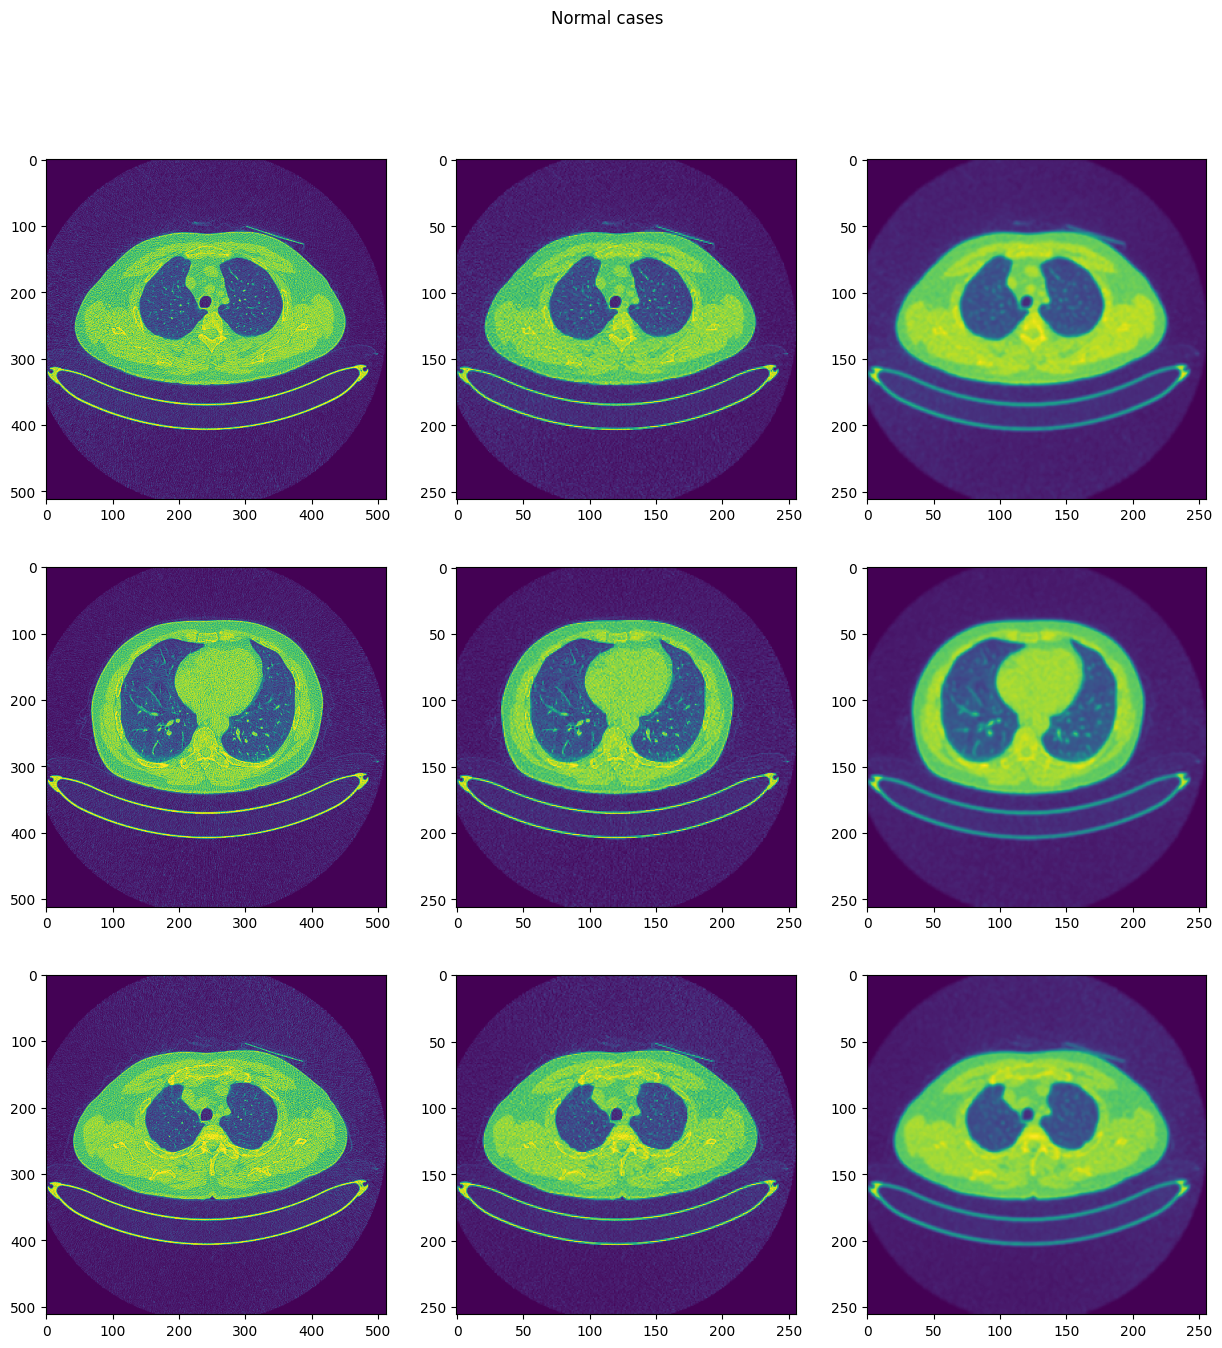

In [ ]:
img_size = 256
for i in categories:
    count, samples = 0, 3
    fig, ax = plt.subplots(samples, 3, figsize=(15, 15))
    fig.suptitle(i)
    
    path = os.path.join(directory, i)
    ind_class = categories.index(i)
    for curr_count, file in enumerate(os.listdir(path)):
        filepath = os.path.join(path, file)
        img = cv2.imread(filepath, 0)
        
        img_2 = cv2.resize(img, (img_size, img_size))
        
        img_3 = cv2.GaussianBlur(img_2, (5, 5), 0)
        
        ax[count, 0].imshow(img)
        ax[count, 1].imshow(img_2)
        ax[count, 2].imshow(img_3)
        count += 1
        if count == samples:
            break
        
plt.show()

# Train Test Split

In [ ]:
data = []
img_size = 256

for i in categories:
    path = os.path.join(directory, i)
    ind_class = categories.index(i)
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        img = cv2.imread(filepath, 0)
        img = cv2.resize(img, (img_size, img_size))
        img = cv2.GaussianBlur(img, (5, 5), 0)
        data.append([img, ind_class])
        
random.shuffle(data)

X, y = [], []
for feature, label in data:
    X.append(feature)
    y.append(label)
    
print('X length:', len(X))
print('y counts:', Counter(y))

# normalize
X = np.array(X).reshape(-1, img_size, img_size, 1)
X = X / 255.0
y = np.array(y)

X length: 1110
y counts: Counter({1: 564, 2: 426, 0: 120})


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=10, stratify=y)

print(len(X_train), X_train.shape)
print(len(X_valid), X_valid.shape)

832 (832, 256, 256, 1)
278 (278, 256, 256, 1)


# Oversampling/ Extrapolating

In [ ]:

print(Counter(y_train), Counter(y_valid))

Counter({1: 420, 2: 312, 0: 90}) Counter({1: 141, 2: 104, 0: 30})


In [ ]:
print(len(X_train), X_train.shape)

X_train = X_train.reshape(X_train.shape[0], img_size*img_size*1)

print(len(X_train), X_train.shape)

822 (822, 256, 256, 1)
822 (822, 65536)


In [ ]:
print('Before SMOTE:', Counter(y_train))
smote = SMOTE()
X_train_sampled, y_train_sampled = smote.fit_resample(X_train, y_train)
print('After SMOTE:', Counter(y_train_sampled))

Before SMOTE: Counter({1: 420, 2: 312, 0: 90})
After SMOTE: Counter({2: 420, 1: 420, 0: 420})


In [ ]:
X_train = X_train.reshape(X_train.shape[0], img_size, img_size, 1)
X_train_sampled = X_train_sampled.reshape(X_train_sampled.shape[0], img_size, img_size, 1)

print(len(X_train), X_train.shape)
print(len(X_train_sampled), X_train_sampled.shape)

822 (822, 256, 256, 1)
1260 (1260, 256, 256, 1)


# Model Building - Imbalanced

In [ ]:
base_model = Sequential()

base_model.add(Conv2D(64, (3, 3), input_shape=X_train.shape[1:]))
base_model.add(Activation('relu'))
base_model.add(MaxPooling2D(pool_size=(2, 2)))

base_model.add(Conv2D(64, (3, 3), activation='relu'))
base_model.add(MaxPooling2D(pool_size=(2, 2)))

base_model.add(Flatten())
base_model.add(Dense(16))
base_model.add(Dense(3, activation='softmax'))

base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      640       
                                                                 
 activation (Activation)     (None, 254, 254, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 246016)            0

In [ ]:
base_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = base_model.fit(X_train, y_train, batch_size=8, epochs=5, validation_data=(X_valid, y_valid))

Epoch 1/5
103/103 [==============================] - 104s 1s/step - loss: 0.9347 - accuracy: 0.7129 - val_loss: 0.2266 - val_accuracy: 0.9345
Epoch 2/5
103/103 [==============================] - 100s 976ms/step - loss: 0.1048 - accuracy: 0.9708 - val_loss: 0.0668 - val_accuracy: 0.9782
Epoch 3/5
103/103 [==============================] - 108s 1s/step - loss: 0.0219 - accuracy: 0.9951 - val_loss: 0.0453 - val_accuracy: 0.9818
Epoch 4/5
103/103 [==============================] - 103s 995ms/step - loss: 0.0096 - accuracy: 0.9988 - val_loss: 0.1080 - val_accuracy: 0.9782
Epoch 5/5
103/103 [==============================] - 104s 1s/step - loss: 0.0358 - accuracy: 0.9939 - val_loss: 0.0611 - val_accuracy: 0.9782


# Results

In [ ]:
y_pred = base_model.predict(X_valid, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_valid, y_pred_bool))

print(confusion_matrix(y_true=y_valid, y_pred=y_pred_bool))

9/9 [==============================] - 7s 767ms/step
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        30
           1       0.99      1.00      1.00       141
           2       0.98      0.96      0.97       104

    accuracy                           0.98       275
   macro avg       0.96      0.96      0.96       275
weighted avg       0.98      0.98      0.98       275

[[ 28   0   2]
 [  0 141   0]
 [  3   1 100]]


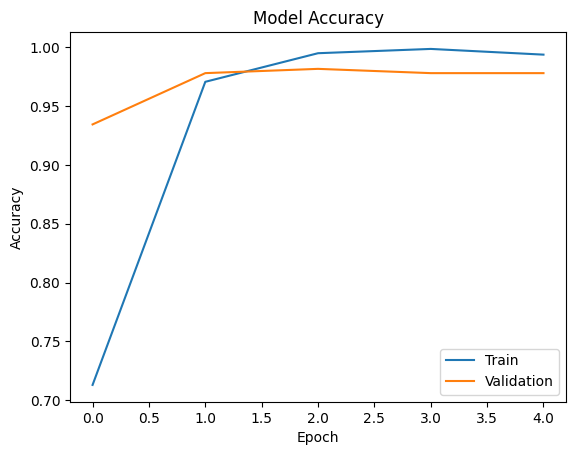

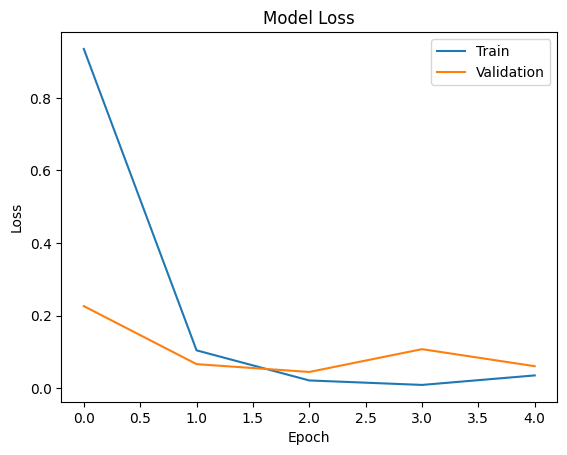

In [ ]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Using Extrapolated Data: 2 Conv, Batch Size 4, Epochs 10

In [ ]:
model_1 = Sequential()

model_1.add(Conv2D(64, (3, 3), input_shape=X_train.shape[1:]))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Conv2D(64, (3, 3), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Flatten())
model_1.add(Dense(16))
model_1.add(Dense(3, activation='softmax'))

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 254, 254, 64)      640       
                                                                 
 activation_1 (Activation)   (None, 254, 254, 64)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 127, 127, 64)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 246016)           

In [ ]:
model_1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model_1.fit(X_train_sampled, y_train_sampled, batch_size=4, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
315/315 [==============================] - 151s 479ms/step - loss: 0.3613 - accuracy: 0.8595 - val_loss: 0.0788 - val_accuracy: 0.9745
Epoch 2/10
315/315 [==============================] - 153s 485ms/step - loss: 0.0540 - accuracy: 0.9865 - val_loss: 0.0673 - val_accuracy: 0.9782
Epoch 3/10
315/315 [==============================] - 147s 467ms/step - loss: 0.0480 - accuracy: 0.9897 - val_loss: 0.0531 - val_accuracy: 0.9782
Epoch 4/10
315/315 [==============================] - 153s 487ms/step - loss: 0.0450 - accuracy: 0.9897 - val_loss: 0.1368 - val_accuracy: 0.9855
Epoch 5/10
315/315 [==============================] - 146s 463ms/step - loss: 0.0144 - accuracy: 0.9976 - val_loss: 0.0999 - val_accuracy: 0.9745
Epoch 6/10
315/315 [==============================] - 146s 465ms/step - loss: 0.0280 - accuracy: 0.9937 - val_loss: 0.0364 - val_accuracy: 0.9855
Epoch 7/10
315/315 [==============================] - 149s 474ms/step - loss: 0.0183 - accuracy: 0.9952 - val_loss: 0.1150 -

In [ ]:
y_pred = model_1.predict(X_valid, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_valid, y_pred_bool))

print(confusion_matrix(y_true=y_valid, y_pred=y_pred_bool))

9/9 [==============================] - 8s 848ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      1.00      1.00       141
           2       1.00      0.99      1.00       104

    accuracy                           1.00       275
   macro avg       0.99      1.00      0.99       275
weighted avg       1.00      1.00      1.00       275

[[ 30   0   0]
 [  0 141   0]
 [  1   0 103]]


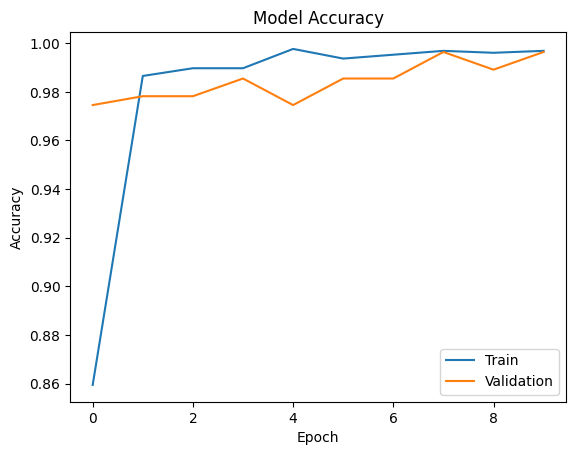

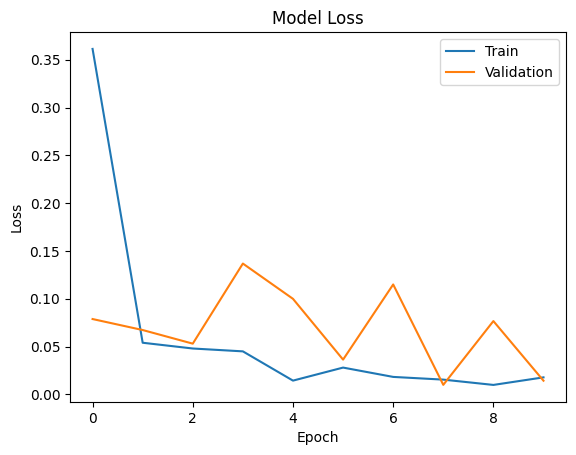

In [ ]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Using Extrapolated Data: 2 Conv, Batch Size 8, Epochs 10

In [ ]:
model_2 = Sequential()

model_2.add(Conv2D(64, (3, 3), input_shape=X_train.shape[1:]))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(64, (3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Flatten())
model_2.add(Dense(16))
model_2.add(Dense(3, activation='softmax'))

model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 64)      640       
                                                                 
 activation_2 (Activation)   (None, 254, 254, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 64)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 246016)           

In [ ]:
model_2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model_2.fit(X_train_sampled, y_train_sampled, batch_size=8, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
158/158 [==============================] - 155s 977ms/step - loss: 0.6210 - accuracy: 0.8238 - val_loss: 0.0566 - val_accuracy: 0.9964
Epoch 2/10
158/158 [==============================] - 149s 942ms/step - loss: 0.0481 - accuracy: 0.9889 - val_loss: 0.0572 - val_accuracy: 0.9818
Epoch 3/10
158/158 [==============================] - 148s 939ms/step - loss: 0.0255 - accuracy: 0.9952 - val_loss: 0.0262 - val_accuracy: 0.9927
Epoch 4/10
158/158 [==============================] - 148s 935ms/step - loss: 0.0326 - accuracy: 0.9952 - val_loss: 0.0151 - val_accuracy: 1.0000
Epoch 5/10
158/158 [==============================] - 147s 931ms/step - loss: 0.0245 - accuracy: 0.9960 - val_loss: 0.0205 - val_accuracy: 0.9964
Epoch 6/10
158/158 [==============================] - 147s 932ms/step - loss: 0.0170 - accuracy: 0.9968 - val_loss: 0.0465 - val_accuracy: 0.9927
Epoch 7/10
158/158 [==============================] - 147s 933ms/step - loss: 0.0161 - accuracy: 0.9976 - val_loss: 0.0060 -

In [ ]:
y_pred = model_2.predict(X_valid, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_valid, y_pred_bool))

print(confusion_matrix(y_true=y_valid, y_pred=y_pred_bool))

9/9 [==============================] - 8s 920ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      1.00      1.00       141
           2       1.00      0.99      1.00       104

    accuracy                           1.00       275
   macro avg       0.99      1.00      0.99       275
weighted avg       1.00      1.00      1.00       275

[[ 30   0   0]
 [  0 141   0]
 [  1   0 103]]


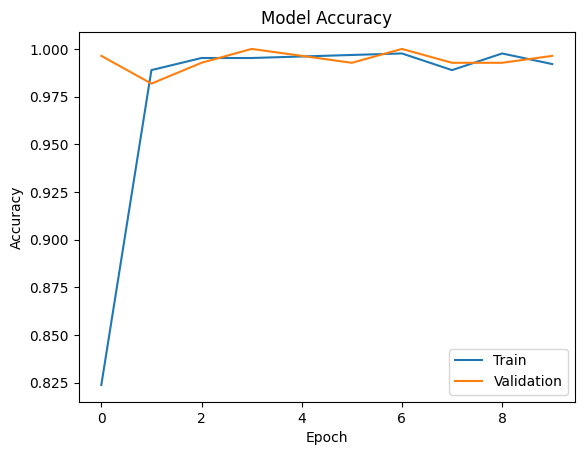

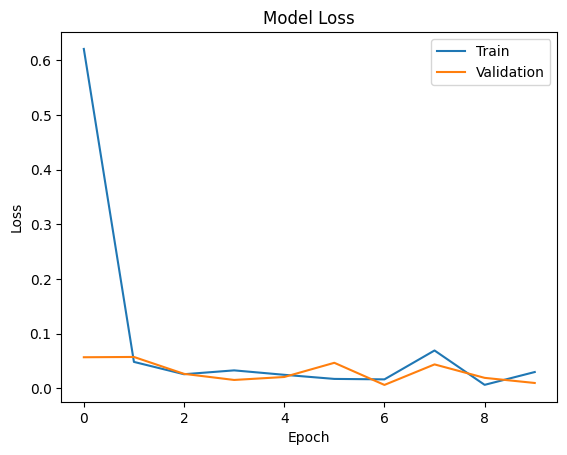

In [ ]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Using Extrapolated Data: 1 Conv, Batch Size 8, Epochs 10

In [ ]:
model_3 = Sequential()

model_3.add(Conv2D(64, (3, 3), input_shape=X_train.shape[1:]))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

model_3.add(Flatten())
model_3.add(Dense(16))
model_3.add(Dense(3, activation='softmax'))

model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 64)      640       
                                                                 
 activation_3 (Activation)   (None, 254, 254, 64)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 64)     0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1032256)           0         
                                                                 
 dense_6 (Dense)             (None, 16)                16516112  
                                                                 
 dense_7 (Dense)             (None, 3)                 51        
                                                      

In [ ]:
model_3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model_3.fit(X_train_sampled, y_train_sampled, batch_size=8, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
158/158 [==============================] - 79s 495ms/step - loss: 2.4468 - accuracy: 0.8484 - val_loss: 0.0894 - val_accuracy: 0.9745
Epoch 2/10
158/158 [==============================] - 75s 476ms/step - loss: 0.0228 - accuracy: 0.9937 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 3/10
158/158 [==============================] - 77s 486ms/step - loss: 0.0156 - accuracy: 0.9960 - val_loss: 0.0501 - val_accuracy: 0.9818
Epoch 4/10
158/158 [==============================] - 76s 484ms/step - loss: 0.0209 - accuracy: 0.9960 - val_loss: 0.0075 - val_accuracy: 0.9927
Epoch 5/10
158/158 [==============================] - 79s 498ms/step - loss: 0.0137 - accuracy: 0.9976 - val_loss: 0.0334 - val_accuracy: 0.9855
Epoch 6/10
158/158 [==============================] - 75s 476ms/step - loss: 0.0148 - accuracy: 0.9976 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 7/10
158/158 [==============================] - 78s 495ms/step - loss: 3.9960e-04 - accuracy: 1.0000 - val_loss: 0.0369 - va

In [ ]:
y_pred = model_3.predict(X_valid, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_valid, y_pred_bool))

print(confusion_matrix(y_true=y_valid, y_pred=y_pred_bool))

9/9 [==============================] - 4s 460ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       0.99      1.00      1.00       141
           2       1.00      0.98      0.99       104

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

[[ 30   0   0]
 [  0 141   0]
 [  1   1 102]]


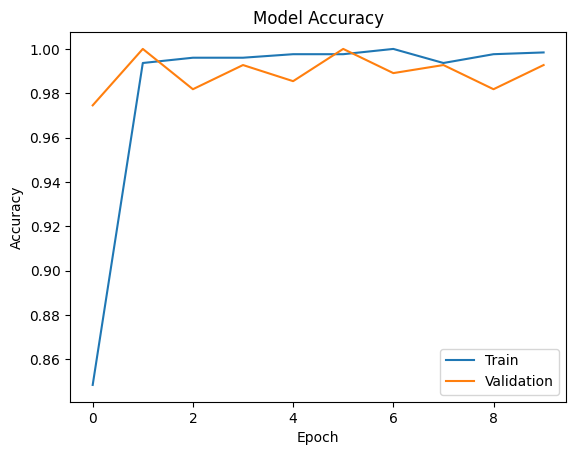

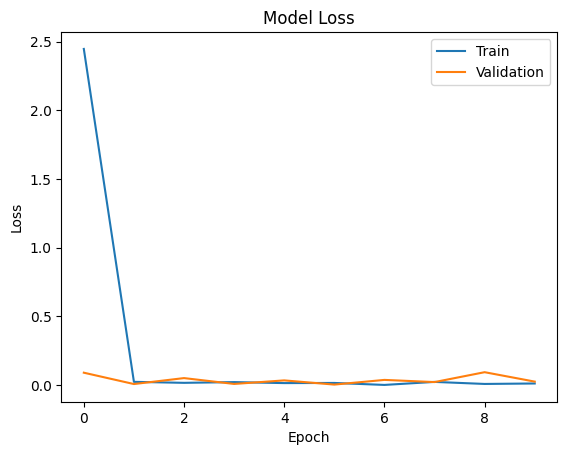

In [ ]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Class Weighted Approach

In [ ]:
model_4 = Sequential()

model_4.add(Conv2D(64, (3, 3), input_shape=X_train.shape[1:]))
model_4.add(Activation('relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))

model_4.add(Conv2D(64, (3, 3), activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))

model_4.add(Flatten())
model_4.add(Dense(16))
model_4.add(Dense(3, activation='softmax'))

model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      640       
                                                                 
 activation (Activation)     (None, 254, 254, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 246016)            0

In [ ]:
model_4.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
new_weights = {
    0: X_train.shape[0]/(3*Counter(y_train)[0]),
    1: X_train.shape[0]/(3*Counter(y_train)[1]),
    2: X_train.shape[0]/(3*Counter(y_train)[2]),
}

new_weights

{0: 3.0814814814814815, 1: 0.6556343577620173, 2: 0.8693834900731452}

In [ ]:
history = model_4.fit(X_train, y_train, batch_size=8, epochs=10, validation_data=(X_valid, y_valid), class_weight=new_weights)

Epoch 1/10
104/104 [==============================] - 222s 2s/step - loss: 1.3527 - accuracy: 0.5721 - val_loss: 1.3013 - val_accuracy: 0.6367
Epoch 2/10
104/104 [==============================] - 203s 2s/step - loss: 0.3406 - accuracy: 0.8750 - val_loss: 0.1265 - val_accuracy: 0.9712
Epoch 3/10
104/104 [==============================] - 198s 2s/step - loss: 0.0668 - accuracy: 0.9856 - val_loss: 0.1389 - val_accuracy: 0.9820
Epoch 4/10
104/104 [==============================] - 208s 2s/step - loss: 0.0553 - accuracy: 0.9940 - val_loss: 0.0602 - val_accuracy: 0.9820
Epoch 5/10
104/104 [==============================] - 202s 2s/step - loss: 0.0301 - accuracy: 0.9928 - val_loss: 0.0315 - val_accuracy: 0.9856
Epoch 6/10
104/104 [==============================] - 202s 2s/step - loss: 0.0449 - accuracy: 0.9952 - val_loss: 0.0749 - val_accuracy: 0.9820
Epoch 7/10
104/104 [==============================] - 197s 2s/step - loss: 0.0209 - accuracy: 0.9952 - val_loss: 0.0744 - val_accuracy: 0.9856

In [ ]:
y_pred = model_4.predict(X_valid, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_valid, y_pred_bool))

print(confusion_matrix(y_true=y_valid, y_pred=y_pred_bool))

9/9 [==============================] - 16s 2s/step
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        30
           1       1.00      1.00      1.00       141
           2       0.96      1.00      0.98       107

    accuracy                           0.99       278
   macro avg       0.99      0.96      0.97       278
weighted avg       0.99      0.99      0.99       278

[[ 26   0   4]
 [  0 141   0]
 [  0   0 107]]


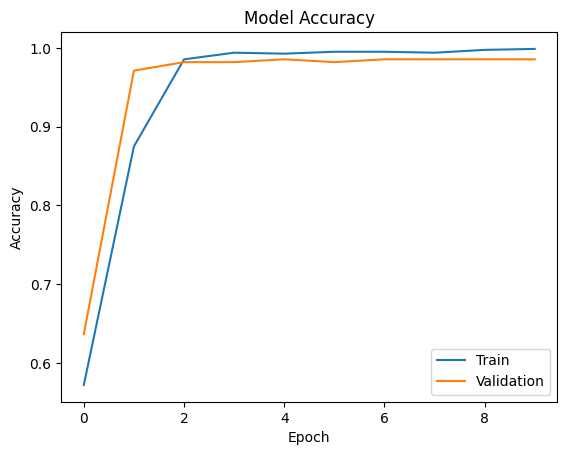

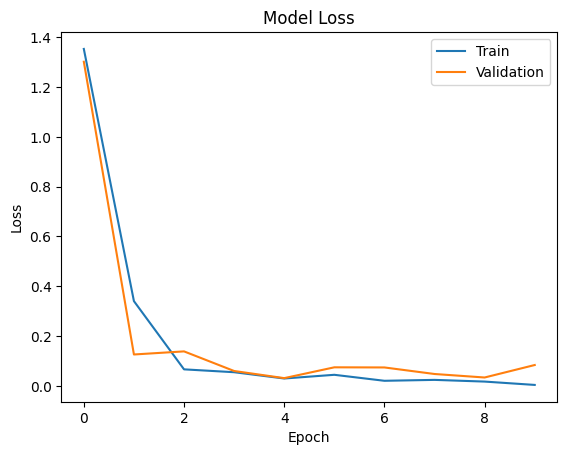

In [ ]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
#Tried displaying filters for insights, but no leads there

from keras import backend as K

# Extract the filters from the first convolutional layer
filters, biases = model_4.layers[0].get_weights()

# Normalize filter values to 0-1 so they can be visualized
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# Print the filters
print(filters.shape)
for i in range(filters.shape[3]):
    print('Filter %d:' % i)
    f = filters[:, :, :, i]
    for j in range(f.shape[2]):
        print(f[:, :, j])
        print('\n')

(3, 3, 1, 64)
Filter 0:
[[0.8503824  0.23186049 0.2590623 ]
 [0.05795632 0.8734657  0.5063301 ]
 [0.04225429 0.13436903 0.6473298 ]]


Filter 1:
[[0.35273495 0.17917703 0.27843618]
 [0.30385894 0.41762945 0.5099273 ]
 [0.772963   0.2940233  0.6213764 ]]


Filter 2:
[[0.0908822  0.26496845 0.8422757 ]
 [0.21831119 0.5121676  0.4829965 ]
 [0.03711792 0.5139007  0.5737643 ]]


Filter 3:
[[0.16895849 0.3869658  0.3278851 ]
 [0.4196805  0.75574845 0.66860795]
 [0.8825701  0.13924572 0.21297242]]


Filter 4:
[[0.7098816  0.32008725 0.44349673]
 [0.45179686 0.7862426  0.735859  ]
 [0.04279421 0.505527   0.02321225]]


Filter 5:
[[0.7650555  0.62573653 0.1557701 ]
 [0.7471803  0.7338461  0.7532965 ]
 [0.01943173 0.5138035  0.25800267]]


Filter 6:
[[0.6149249  0.18061101 0.44271013]
 [0.07254811 0.573572   0.7924062 ]
 [0.60568905 0.29946917 0.76164323]]


Filter 7:
[[0.15916474 0.64129823 0.3997297 ]
 [0.26360774 0.40365815 0.08729421]
 [0.59999275 0.245723   0.71868783]]


Filter 8:
[[0.7632